In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

def tensor_to_pil_image(tensor_image):
    """
    Convert a PyTorch tensor to a PIL image.
    """
    tensor_image = tensor_image.squeeze(0)  # Remove the batch dimension if it's there
    tensor_image = tensor_image.permute(1, 2, 0)  # Change the order of dimensions to (H, W, C)
    tensor_image = tensor_image.mul(255).byte()  # Scale to 0-255 and convert to bytes
    numpy_image = tensor_image.cpu().numpy()  # Convert back to a numpy array
    pil_image = Image.fromarray(numpy_image)  # Convert to a PIL image
    return pil_image

def save_video(frames, dir_name, filename, fps=10):
    def animate(j):
        return [plt.imshow(frames[j], animated=True)]
    
    fig = plt.figure()
    ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True)
    writer = animation.FFMpegWriter(fps=fps, bitrate=1800)  
    ani.save(f"{dir_name}/{filename}", writer=writer)

## Extracted vis feature when the detect flag is turned on

number of trajectories:  1
number of frames:  46


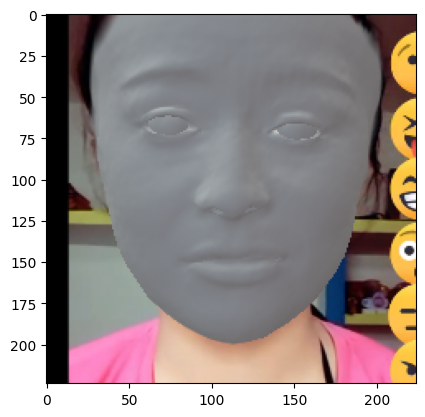

In [5]:
feat = np.load('vis_detect_on.npy', allow_pickle=True).item()
print("number of trajectories: ", len(feat['traj']))

traj_index = 0
traj = feat['traj'][traj_index]
print("number of frames: ", len(traj))

frames = []  
for frame_dict in traj:
    tensor_image = frame_dict['output_images_detail']
    pil_image = tensor_to_pil_image(tensor_image)
    frames.append(pil_image)
    
save_video(frames, ".", "vis.mp4", fps=10) 

## Extracted vis feature when the detect flag is turned off

Only works if your data is cropped!

number of trajectories:  1
number of frames:  46


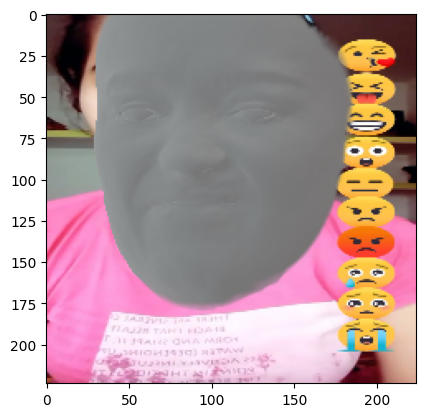

In [4]:
feat = np.load('vis_detect_off.npy', allow_pickle=True).item()
print("number of trajectories: ", len(feat['traj']))

traj_index = 0
traj = feat['traj'][traj_index]
print("number of frames: ", len(traj))

frames = []  
for frame_dict in traj:
    tensor_image = frame_dict['output_images_detail']
    pil_image = tensor_to_pil_image(tensor_image)
    frames.append(pil_image)
    
save_video(frames, ".", "vis.mp4", fps=10) 